In [84]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as ctrl

In [85]:
reservar = np.linspace(2,2,5)

##### Creación de las variables difusas las cuales contiene 2 entradas 1 salida.

In [86]:
d1 = ctrl.Antecedent(reservar,"d1")
d2 = ctrl.Antecedent(reservar,"d2")
d3 = ctrl.Consequent(reservar,"d3")

#### iniciar las variables difusas la cual se creara con names en la cual crearemos los nombres de los salones.Utilizaremos automf para asignarles valor a nuestras variables

In [87]:
names = ['capacitacion','audiovisual','informatica']

In [88]:
d1.automf(names=names)
d2.automf(names=names)
d3.automf(names=names)

#### Definición de las reglas

In [89]:
regla0 = ctrl.Rule(antecedent=((d1['capacitacion'] & d2['capacitacion'])|
                               (d1['audiovisual'] & d2['informatica']) |
                               (d1['capacitacion']& d2['audiovisual'])),
         consequent=d3['capacitacion'], label='salon capacitacion')          

In [90]:
regla1 = ctrl.Rule(antecedent=((d1['capacitacion'] & d2['informatica'])|
                               (d1['capacitacion'] & d2['audiovisual']) |
                               (d1['audiovisual']  & d2['audiovisual'])),
        consequent=d3['audiovisual'], label='rule audiovisual')

In [91]:
sistemareservas = ctrl.ControlSystem(rules=[regla0, regla1])

In [92]:
sim = ctrl.ControlSystemSimulation(sistemareservas, flush_after_run=21 * 21 + 1)

#### con el usuo de las simulaciones identificaremos como se comporta nuestras reglas decifinidas con los valores d1,d2,d3 la cual sera nuestra salida

In [93]:
upsampled = np.linspace(2, 2, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

#### Recorremos nuestras variables iniciales las cuales tendran una iteracion repetitiva

In [94]:
for i in range(21):
    for j in range(21):
        sim.input['d1'] = x[i, j]
        sim.input['d2'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['d3']


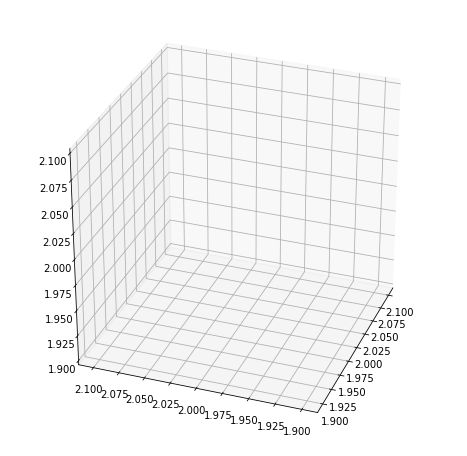

In [56]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)